In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../pool_data_202211111622.csv')

In [5]:
df.head()

,pool_id,time_stamp,salinity,flow switch,flow meter,turbidity,ORP,PH,TDS,Pressure in tank,...,Shw msg,Drain,Human Counter,temperature,water level,cppm,phfeedtime,orpfeedtime,bather in from mens,bather in from ladies
0,10001,2022-11-01 11:01:16.220 -0400,287.175,NaN,NaN,9.51440,774.049,7.41573,287.175,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
1,10001,2022-11-01 11:01:26.323 -0400,287.175,NaN,NaN,9.35767,773.597,7.41573,287.175,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
2,10001,2022-11-01 11:01:36.386 -0400,287.121,NaN,NaN,9.35767,773.869,7.41889,287.121,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
3,10001,2022-11-01 11:01:46.498 -0400,287.248,NaN,NaN,8.57397,773.959,7.41193,287.248,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN
4,10001,2022-11-01 11:01:56.554 -0400,287.175,NaN,NaN,8.88745,773.597,7.41699,287.157,NaN,...,NaN,0.0,0.0,74.2574,500.0,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['pool_id', 'time_stamp', 'salinity', 'flow switch', 'flow meter',
       'turbidity', 'ORP', 'PH', 'TDS', 'Pressure in tank', 'Pressure in',
       'Pressure out', 'Pump RPM', 'pump current', 'dis_feeder', 'ph_feeder',
       'Fresh water', 'Shw msg', 'Drain', 'Human Counter', 'temperature',
       'water level', 'cppm', 'phfeedtime', 'orpfeedtime',
       'bather in from mens', 'bather in from ladies'],
      dtype='object')

We want to remove some the columns we know aren't necessary.

The following columns are deprecated from the client:
- `flow switch`
- `flow meter`
- `Pressure in tank`
- `Shw msg`
- `phfeedtime`
- `orpfeedtime`

In [7]:
deprecated_col = ['flow switch', 'flow meter', 'Pressure in tank', 'Shw msg', 'phfeedtime', 'orpfeedtime']

df = df.drop(deprecated_col, axis=1)
df.head()

,pool_id,time_stamp,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,Pump RPM,...,dis_feeder,ph_feeder,Fresh water,Drain,Human Counter,temperature,water level,cppm,bather in from mens,bather in from ladies
0,10001,2022-11-01 11:01:16.220 -0400,287.175,9.51440,774.049,7.41573,287.175,2.53581,2.53346,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN
1,10001,2022-11-01 11:01:26.323 -0400,287.175,9.35767,773.597,7.41573,287.175,2.53508,2.53382,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN
2,10001,2022-11-01 11:01:36.386 -0400,287.121,9.35767,773.869,7.41889,287.121,2.53526,2.53382,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN
3,10001,2022-11-01 11:01:46.498 -0400,287.248,8.57397,773.959,7.41193,287.248,2.53545,2.53382,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN
4,10001,2022-11-01 11:01:56.554 -0400,287.175,8.88745,773.597,7.41699,287.157,2.53508,2.53382,NaN,...,NaN,NaN,0.0,0.0,0.0,74.2574,500.0,NaN,NaN,NaN


Lets tidy up our data. `cppm` is calculated from ORP and thus is not necessary. We also do not have data for `bather in from mens` and `bather in from ladies`. We will remove these as well then look at missing values.

In [8]:
unnecessary_data = ['cppm', 'bather in from mens', 'bather in from ladies']

df = df.drop(unnecessary_data, axis=1)
df.columns

Index(['pool_id', 'time_stamp', 'salinity', 'turbidity', 'ORP', 'PH', 'TDS',
       'Pressure in', 'Pressure out', 'Pump RPM', 'pump current', 'dis_feeder',
       'ph_feeder', 'Fresh water', 'Drain', 'Human Counter', 'temperature',
       'water level'],
      dtype='object')

In [9]:
df.isna().sum()

pool_id              0
time_stamp           0
salinity            31
turbidity           31
ORP                  0
PH                   0
TDS                 31
Pressure in         31
Pressure out        31
Pump RPM         43635
pump current        31
dis_feeder       43635
ph_feeder        43635
Fresh water         31
Drain               31
Human Counter       31
temperature          0
water level         31
dtype: int64

In [10]:
len(df)

43635

Comparing our missing data and the len of the dataframe, we see that the columns `Pump RPM`, `dis_feeder`, and `ph_feeder` are completely empty. We will drop those columns.

In [11]:
empty_col = ['Pump RPM', 'dis_feeder', 'ph_feeder']

df = df.drop(empty_col, axis=1)
df.columns

Index(['pool_id', 'time_stamp', 'salinity', 'turbidity', 'ORP', 'PH', 'TDS',
       'Pressure in', 'Pressure out', 'pump current', 'Fresh water', 'Drain',
       'Human Counter', 'temperature', 'water level'],
      dtype='object')

In [12]:
df.head()

,pool_id,time_stamp,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level
0,10001,2022-11-01 11:01:16.220 -0400,287.175,9.51440,774.049,7.41573,287.175,2.53581,2.53346,0.0,0.0,0.0,0.0,74.2574,500.0
1,10001,2022-11-01 11:01:26.323 -0400,287.175,9.35767,773.597,7.41573,287.175,2.53508,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
2,10001,2022-11-01 11:01:36.386 -0400,287.121,9.35767,773.869,7.41889,287.121,2.53526,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
3,10001,2022-11-01 11:01:46.498 -0400,287.248,8.57397,773.959,7.41193,287.248,2.53545,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0
4,10001,2022-11-01 11:01:56.554 -0400,287.175,8.88745,773.597,7.41699,287.157,2.53508,2.53382,0.0,0.0,0.0,0.0,74.2574,500.0


In [13]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'], utc=True) #Convert to timestamp dtype through UTC
df['time_stamp'] = df['time_stamp'].dt.tz_convert('Canada/Eastern') #Convert back to Canadian Eastern time
df['time_stamp'] = df['time_stamp'].dt.tz_localize(None) #Remove localization information

In [14]:
df['time_stamp'] 

0       2022-11-01 11:01:16.220
1       2022-11-01 11:01:26.323
2       2022-11-01 11:01:36.386
3       2022-11-01 11:01:46.498
4       2022-11-01 11:01:56.554
                  ...          
43630   2022-11-01 11:00:26.794
43631   2022-11-01 11:00:36.852
43632   2022-11-01 11:00:46.971
43633   2022-11-01 11:00:56.031
43634   2022-11-01 11:01:06.155
Name: time_stamp, Length: 43635, dtype: datetime64[ns]

In [15]:
df = df.sort_values(by='time_stamp')
df.head()

,pool_id,time_stamp,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level
39668,10001,2022-11-01 00:00:06.605,285.584,6.53613,788.607,7.46826,285.584,2.53725,2.53545,0.0,0.0,0.0,0.0,74.2574,500.0
39669,10001,2022-11-01 00:00:16.661,285.638,6.37939,788.879,7.46067,285.638,2.53780,2.53617,0.0,0.0,0.0,0.0,74.2574,500.0
39670,10001,2022-11-01 00:00:26.768,285.855,5.75244,788.336,7.42585,285.873,2.53870,2.53743,0.0,0.0,0.0,0.0,74.2574,500.0
39671,10001,2022-11-01 00:00:36.834,285.855,5.59570,788.065,7.43408,285.855,2.53852,2.53743,0.0,0.0,0.0,0.0,74.2574,500.0
39672,10001,2022-11-01 00:00:46.936,285.765,5.59570,788.879,7.43345,285.765,2.53870,2.53725,0.0,0.0,0.0,0.0,74.2574,500.0


Today, we're going to focus on creating an alert each time our pH is out of scope. Oour ideal range is 7.2-7.8 pH with a target of 7.6. Lets start by plotting out our pH and seeing where it stands.

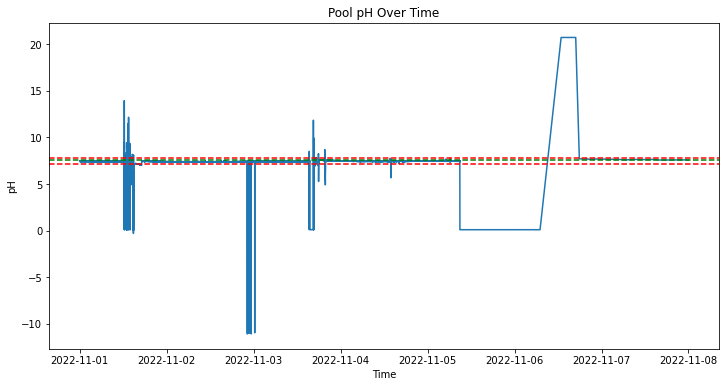

In [16]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df['time_stamp'], df['PH'])
ax.set_xlabel('Time')
ax.set_ylabel('pH')
ax.set_title('Pool pH Over Time')
ax.axhline(y=7.2, linestyle='--',color='red')
ax.axhline(y=7.8, linestyle='--',color='red')
ax.axhline(y=7.6, linestyle='--',color='green')

In [103]:
def ph_warning(time, data, pool_id):
    df = data
    df.sort_values(by='time_stamp')
    
    try:
        df.set_index('time_stamp', inplace=True)
    except KeyError:
        pass
    
    pool = df[df['pool_id'] == pool_id]
    ph = pool.loc[time]['PH']
    print(f'pH for pool {pool_id} is currently {ph[0]}')
    
    if ph[0] >= 7.8:
        print('pH too basic, take immediate action')
    elif ph[0] <= 7.2:
        print('pH too acidic, take immediate action')
    elif ph[0] < 7.5:
        print('pH becoming acidic, consider taking action')
    elif ph[0] > 7.65:
        print('pH becoming basic, consider taking action')
    else:
        print('pH is okay')
        
    ph_minutes(time, pool)
    ph_summary(time, pool)

In [137]:
def ph_minutes(time, data):
    df = data
    time = pd.to_datetime(time)
    previous_time = time-pd.Timedelta("2 minutes")
    
    df_time = df.loc[time-pd.Timedelta("2 minutes"): time+pd.Timedelta("2 minutes")] # avoid end of index issues
    #print(df_time)
    df_time.plot(y='PH', use_index=True)
    

In [139]:
def ph_summary(time, data):
    df = data
    time = pd.to_datetime(time)
    

    df_summary = df.loc[time-pd.Timedelta("24 hours"): time]

    #print(df_summary)
    df_summary.plot(y='PH', use_index=True)
    
    max_ph = max(df_summary['PH'])
    min_ph = min(df_summary['PH'])
    avg_ph = df_summary['PH'].mean()

    print(f"""
            In the 24 hours from {time} we have the following information:\n
            Max pH: {max_ph} \n 
            Min pH: {min_ph} \n
            Average pH: {avg_ph} \n
            Out of Range Time (%): TBD
            """)

pH for pool 10001 is currently 7.60182
pH is okay

            In the 24 hours from 2022-11-07 21:59:24 we have the following information:

            Max pH: 7.6917 
 
            Min pH: 7.5689 

            Average pH: 7.622703783783783 

            Out of Range Time (%): TBD
            


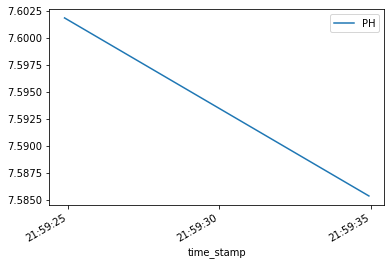

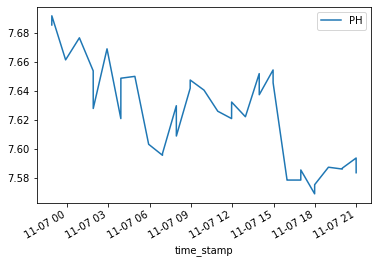

In [140]:
pool_id = 10001

ph_warning('2022-11-07 21:59:24', df, pool_id)

In [132]:
time = pd.to_datetime('2022-11-07 21:59:24')
previous_time = str(time-pd.Timedelta("2 minutes"))
str_time = str(time)

print(previous_time, str_time)

2022-11-07 21:57:24 2022-11-07 21:59:24


In [134]:
time = pd.to_datetime('2022-11-07 21:59:24')
previous_time = str(time-pd.Timedelta("24 hours"))
str_time = str(time)

print(previous_time, str_time)
df[previous_time:str_time]

2022-11-06 21:59:24 2022-11-07 21:59:24


,pool_id,salinity,turbidity,ORP,PH,TDS,Pressure in,Pressure out,pump current,Fresh water,Drain,Human Counter,temperature,water level
time_stamp,,,,,,,,,,,,,,
2022-11-06 22:53:44.041,10001,278.440,33.77860,744.572,7.68537,278.440,2.51537,2.51465,0.0,0.0,0.0,0.0,74.2574,500.0
2022-11-06 22:53:54.102,10001,278.404,33.46510,744.391,7.69170,278.404,2.51555,2.51393,0.0,0.0,0.0,0.0,74.2574,500.0
2022-11-06 23:53:54.910,10001,279.562,32.83810,742.763,7.66131,279.562,2.51555,2.51447,0.0,0.0,0.0,0.0,74.2574,500.0
2022-11-07 00:53:54.933,10001,280.086,33.46510,739.418,7.67651,280.086,2.51555,2.51411,0.0,0.0,0.0,0.0,74.2574,500.0
2022-11-07 01:54:04.879,10001,280.556,32.68140,737.338,7.65372,280.556,2.51519,2.51411,0.0,0.0,0.0,0.0,74.2574,500.0
2022-11-07 01:54:14.940,10001,280.701,32.68140,737.700,7.62777,280.683,2.51537,2.51374,0.0,0.0,0.0,0.0,74.2574,500.0
2022-11-07 02:54:14.964,10001,280.900,32.21120,736.253,7.66891,280.900,2.51555,2.51429,0.0,0.0,0.0,0.0,74.2574,500.0
2022-11-07 03:54:24.952,10001,281.876,32.21120,735.258,7.62080,281.876,2.51519,2.51393,0.0,0.0,0.0,0.0,74.2574,500.0
2022-11-07 03:54:34.006,10001,281.858,32.36790,735.077,7.64865,281.858,2.51537,2.51411,0.0,0.0,0.0,0.0,74.2574,500.0
